# Matplotlib

In preparing for this session I found a wonderful blog post online that explains this great detail, so a lot of what you're about to see comes from that post. I will instead focus a little more on importing chemical data ourselves and plotting that.

The blog post is called [Pyplot vs Object Oriented Interface](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/) by Tejas Sanap

## Two ways of doing things

There are two main ways of using matplotlib: through pyplot (intended to mimic MATLAB); and through an object oriented interface (much more versatile)

### Generating some data

In [7]:
import numpy as np

time = np.arange(0., 10., 0.2)
velocity = np.zeros_like(time, dtype=float)
distance = np.zeros_like(time, dtype=float)

g = 9.8 	# m/s^2

velocity = g * time
distance = 0.5 * g * np.power(time, 2)

### 1. pyplot

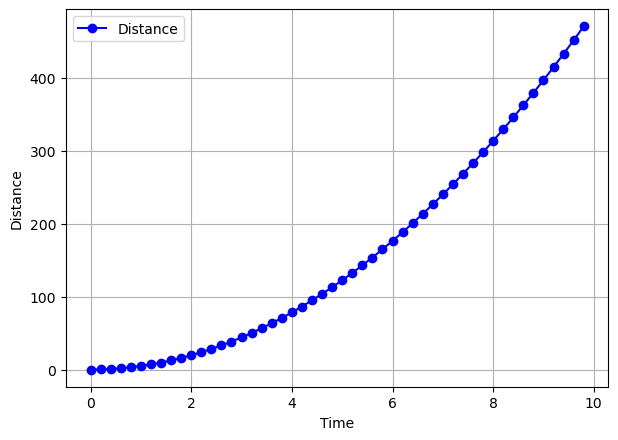

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5), dpi=100)
plt.plot(time,distance,'bo-')
plt.xlabel("Time")
plt.ylabel("Distance")
plt.legend(["Distance"])
plt.grid(True)

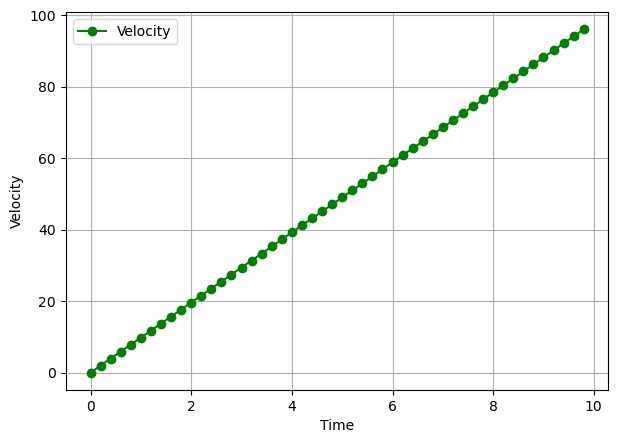

In [9]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(time, velocity,'go-')
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend(["Velocity"])
plt.grid(True)

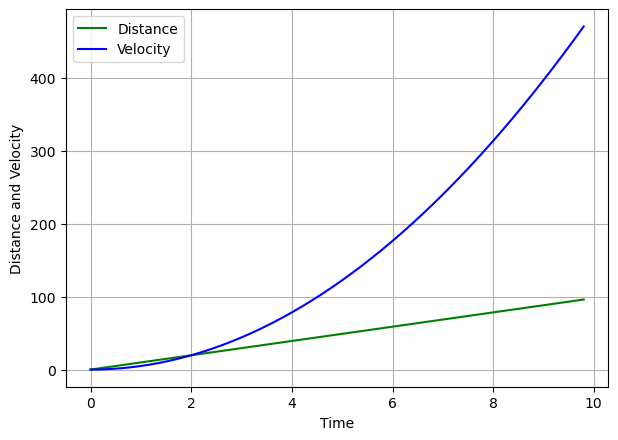

In [10]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(time, velocity,'g-')
plt.plot(time, distance,'b-')
plt.ylabel("Distance and Velocity")
plt.xlabel("Time")
plt.legend(["Distance", "Velocity"])
plt.grid(True)

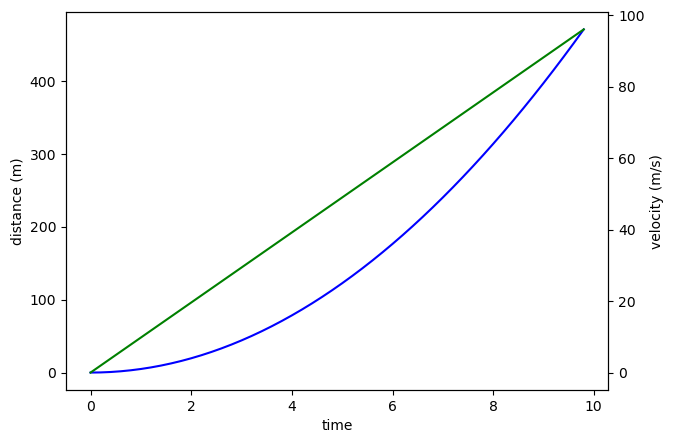

In [13]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("distance (m)")
ax1.set_xlabel("time")
ax1.plot(time, distance, "blue")

ax2 = ax1.twinx() # create another y-axis sharing a common x-axis


ax2.set_ylabel("velocity (m/s)")
ax2.set_xlabel("time")
ax2.plot(time, velocity, "green")

fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show()
fig.savefig('dist-vs-velo.pdf')

## Using our own data

In [ ]:
import pandas as pd

data = pd.read_csv('h2o-curve.csv')